In [1]:
from alab_data.primitives.primitives import Material, Process, Measurement, Analysis

## Mock process

In [5]:
p0 = Process(
    name="procurement",
    generated_material_name="TiO2",
)
m0 = p0.generated_material

In [7]:
p1 = Process(
    name="grinding",
    materials=[m0],
    media="zirconia",
    duration=600,
)
m1 = p1.generated_material
c1 = Measurement(
    name="dynamic light scattering",
    material=m1,
)
a1 = Analysis(
    name="particle size distribution",
    measurement=c1,
)

In [8]:
p2 = Process(
    name="heating",
    materials=[m1],
    temperature=1000,
    duration=600,
)
m2 = p2.generated_material

In [9]:
p3 = Process(
    name="grinding",
    materials=[m2],
    media="zirconia",
    duration=600,
    final_step=True
)
m3 = p3.generated_material

In [10]:
c3 = Measurement(
    name="scanning electron microscopy",
    material=m3,
)
a3 = Analysis(
    name="particle size distribution",
    measurement=c3,
)
a5 = Analysis(
    name="particle composition",
    measurement=c3,
)

c4 = Measurement(
    name="x-ray diffraction",
    material=m3,
)
a4 = Analysis(
    name="phase identification",
    measurement=c4,
)


## Plotting the graph

In [11]:
import networkx as nx

In [20]:
pieces = [p0, p1, p2, p3, c1, a1, c3, a3, c4, a4, a5, m0, m1, m2, m3]
g = nx.DiGraph()

for piece in pieces:
    g.add_node(piece.id, type=type(piece).__name__, name=piece.name)
    for upstream in piece.upstream:
        g.add_edge(upstream, piece.id)

In [21]:
import matplotlib.pyplot as plt
color_key = {

}
for _, attrs in g.nodes.data():
    if attrs["type"] not in color_key:
        color_key[attrs["type"]] = plt.cm.tab10(len(color_key))
color_key

{'Process': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 'Material': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Measurement': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313,
  1.0),
 'Analysis': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392,
  1.0)}

In [22]:
from matplotlib.lines import Line2D

def build_nx_colors(g):
    color_key = dict()
    legend_handles = list()
    for _, attrs in g.nodes.data():
        if attrs["type"] not in color_key:
            color_key[attrs["type"]] = plt.cm.tab10(len(color_key))

            legend_handles.append(
                Line2D([0], [0], color=color_key[attrs["type"]], linestyle="", marker="o", label=attrs["type"])
            )



    colors = []
    for _, attrs in g.nodes.data():
        colors.append(color_key[attrs["type"]])

    
    return colors, legend_handles

In [23]:
g.nodes.data()

NodeDataView({ObjectId('6320006d2cc8a93045745670'): {'type': 'Process', 'name': 'procurement'}, ObjectId('632000802cc8a93045745675'): {'type': 'Process', 'name': 'grinding'}, ObjectId('6320006d2cc8a93045745671'): {'type': 'Material', 'name': 'TiO2'}, ObjectId('632000812cc8a93045745679'): {'type': 'Process', 'name': 'heating'}, ObjectId('632000802cc8a93045745676'): {'type': 'Material', 'name': 'TiO2 - grinding'}, ObjectId('632000812cc8a9304574567b'): {'type': 'Process', 'name': 'grinding'}, ObjectId('632000812cc8a9304574567a'): {'type': 'Material', 'name': 'TiO2 - grinding - heating'}, ObjectId('632000802cc8a93045745677'): {'type': 'Measurement', 'name': 'dynamic light scattering'}, ObjectId('632000802cc8a93045745678'): {'type': 'Analysis', 'name': 'particle size distribution'}, ObjectId('632000822cc8a9304574567d'): {'type': 'Measurement', 'name': 'scanning electron microscopy'}, ObjectId('632000812cc8a9304574567c'): {'type': 'Material', 'name': 'TiO2 - grinding - heating - grinding'}, 

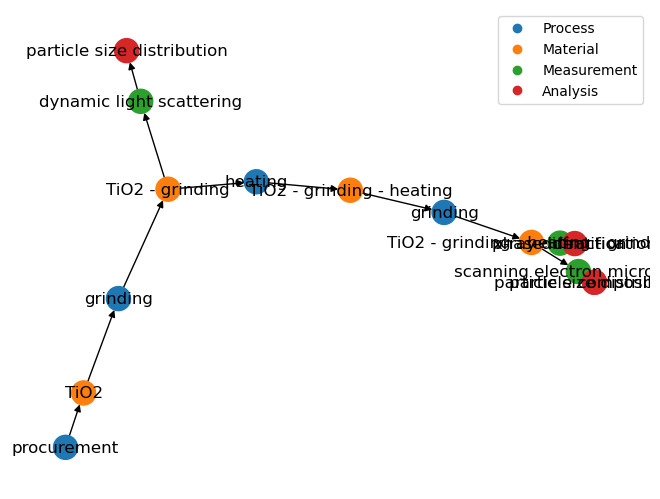

In [36]:
node_color, handles = build_nx_colors(g)
node_labels = {node: data["name"] for node, data in g.nodes.data()}
nx.draw(g, with_labels=True, node_color=node_color, labels=node_labels, pos=nx.spectral_layout(g))
plt.legend(handles=handles)

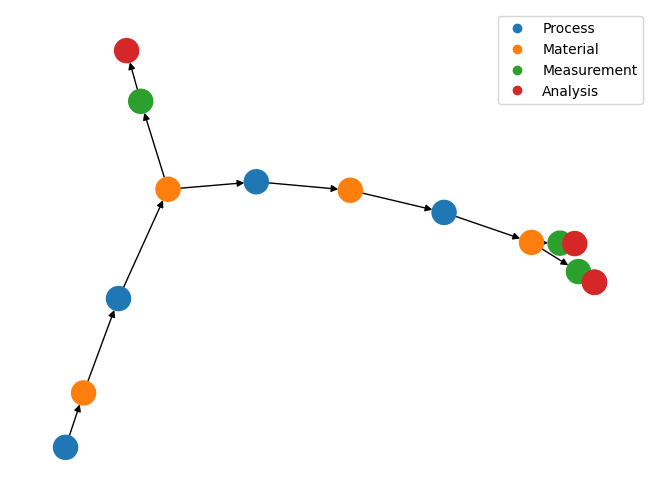

In [37]:
node_color, handles = build_nx_colors(g)
node_labels = {node: data["name"] for node, data in g.nodes.data()}
nx.draw(g, with_labels=False, node_color=node_color, labels=node_labels, pos=nx.spectral_layout(g))
plt.legend(handles=handles)